In [ ]:
# 安裝所需的環境配置
""" 
# %pip install -r requirements.txt

%pip install pandas==2.2.3
%pip install numpy==2.2.4
%pip install matplotlib==3.10.0
%pip install ipykernel==6.29.5
%pip install scikit-learn==1.6.1
%pip install scipy==1.15.3 
"""

Note: you may need to restart the kernel to use updated packages.


### 載入所需函示庫

In [2]:
import pandas as pd   # 用於數據處理和分析
import numpy as np    # 用於數值和矩陣計算
import matplotlib     # 用於數據可視化
import sklearn        # 用於機器學習和數據挖掘
import scipy          # 用於科學計算和技術計算
import IPython        # 用於交互式計算和數據分析
import matplotlib.pyplot as plt  # 用於繪圖

from sklearn.metrics import jaccard_score   # 計算 Jaccard similarity
from scipy.stats import pearsonr            # 計算 Pearson correlation coefficient
from itertools import combinations          # 用於生成組合

# 確認環境設定是否符合要求
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)
print("IPython version:", IPython.__version__)

Pandas version: 2.2.3
NumPy version: 2.2.4
Matplotlib version: 3.10.0
Scikit-learn version: 1.6.1
SciPy version: 1.15.3
IPython version: 9.0.2


## Section 1: Similarity Computations

In [11]:
# 將資料轉換為矩陣，方便後續使用程式碼驗算。
users = ["Willy", "Xavier", "Yvonne", "Zac"]
movies = ["La La Land", "The Lion King", "Parasite", "Joker", "John Wick 3"]

# 是否觀看矩陣，1 表示觀看，0 表示未觀看。
watched = np.array([
    [1, 1, 1, 0, 1],  # Willy
    [1, 1, 1, 0, 0],  # Xavier
    [0, 1, 1, 1, 0],  # Yvonne
    [1, 1, 0, 1, 1]   # Zac
])

# 評分矩陣，數值範圍從 0 到 5，0 表示未評分。
ratings = np.array([
    [5, 5, 4, 0, 4],  # Willy
    [1, 2, 2, 0, 0],  # Xavier
    [0, 2, 1, 5, 0],  # Yvonne
    [2, 2, 0, 1, 1]   # Zac
])

# 視覺化Table
watched_df = pd.DataFrame(watched, index=users, columns=movies)
ratings_df = pd.DataFrame(ratings, index=users, columns=movies)

print("是否觀看資料表（1 表示觀看，0 表示未觀看）：")
display(watched_df)
print("\n評分資料表（0 表示未評分）：")
display(ratings_df)

是否觀看資料表（1 表示觀看，0 表示未觀看）：


,La La Land,The Lion King,Parasite,Joker,John Wick 3
Willy,1,1,1,0,1
Xavier,1,1,1,0,0
Yvonne,0,1,1,1,0
Zac,1,1,0,1,1



評分資料表（0 表示未評分）：


,La La Land,The Lion King,Parasite,Joker,John Wick 3
Willy,5,5,4,0,4
Xavier,1,2,2,0,0
Yvonne,0,2,1,5,0
Zac,2,2,0,1,1


### 1.a Jaccard Similarity (Users)

- 使用「是否觀看」的二元資料，計算所有使用者兩兩之間的 Jaccard 相似度。
- 哪兩位使用者最相似？如有並列，請列出所有最相似的配對。**[3 分]**

#### Jaccard Similarity Function
Jaccard Similarity 衡量兩個集合的重疊、相似程度。數學公式如下：

$$
\text{Jaccard}(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

- \(A\) 和 \(B\)：表示兩個集合（如兩位使用者的觀看電影集合）。
- \(|A $\cap$ B|\)：表示 \(A\) 和 \(B\) 的交集（兩位使用者共同觀看的電影數量）。
- \(|A $\cup$ B|\)：表示 \(A\) 和 \(B\) 的聯集（兩位使用者中任一使用者觀看的電影總數）。

#### 計算所有使用者兩兩之間的 Jaccard 相似度。
1. Willy & Xavier

第一個詳細書寫，後續5個僅寫出Jaccard Similarity Function，省略一一列出所有交集跟聯集的電影名稱！

交集：La La Land, The Lion King, Parasite (3 部)

聯集：La La Land, The Lion King, Parasite, John Wick 3 (4 部)

$$
\text{Jaccard}(Willy, Xavier) = \frac{|Willy \cap Xavier|}{|Willy \cup Xavier|} = \frac{3}{4} = 0.75
$$

2. Willy & Yvonne

交集： 2 部

聯集： 5 部

$$
\text{Jaccard}(Willy, Yvonne) = \frac{|Willy \cap Yvonne|}{|Willy \cup Yvonne|} = \frac{2}{5} = 0.4
$$

3. Willy & Zac

交集： 3 部

聯集： 5 部

$$
\text{Jaccard}(Willy, Zac) = \frac{|Willy \cap Zac|}{|Willy \cup Zac|} = \frac{3}{5} = 0.6
$$

4. Xavier & Yvonne

交集： 2 部

聯集： 4 部

$$
\text{Jaccard}(Xavier, Yvonne) = \frac{|Xavier \cap Yvonne|}{|Xavier \cup Yvonne|} = \frac{2}{4} = 0.5
$$

5. Xavier & Zac

交集： 2 部

聯集： 5 部

$$
\text{Jaccard}(Xavier, Zac) = \frac{|Xavier \cap Zac|}{|Xavier \cup Zac|} = \frac{2}{5} = 0.4
$$

6. Yvonne & Zac

交集： 2 部

聯集： 5 部

$$
\text{Jaccard}(Yvonne, Zac) = \frac{|Yvonne \cap Zac|}{|Yvonne \cup Zac|} = \frac{2}{5} = 0.4
$$

**最相似的兩位使用者為 Willy & Xavier！兩者間的 Jaccard Similarity 為 0.75，是所有最相似的配對。**

In [15]:
jaccard_users = []   # 儲存使用者間的 Jaccard similarity 結果
user_pairs = list(combinations(users, 2))   # 生成使用者兩兩之間的「是否觀看」配對
# 計算使用者兩兩之間的 Jaccard similarity
for user1, user2 in user_pairs:
    idx1 = users.index(user1)
    idx2 = users.index(user2)
    score = jaccard_score(watched[idx1], watched[idx2])
    jaccard_users.append((user1, user2, score))

# 轉為視覺化 DataFrame 
jaccard_users_df = pd.DataFrame(jaccard_users, columns=["User 1", "User 2", "Jaccard Similarity"])
print("\n(a) 使用者間的 Jaccard Similarity：")
display(jaccard_users_df)

# 找出最相似的配對(Jaccard similarity 最大值)
max_jaccard = jaccard_users_df["Jaccard Similarity"].max()
most_similar_users = jaccard_users_df[jaccard_users_df["Jaccard Similarity"] == max_jaccard]
print("\n最相似的兩位使用者配對：")
for _, row in most_similar_users.iterrows():
    print(f"{row['User 1']} 和 {row['User 2']}，Jaccard Similarity = {row['Jaccard Similarity']:.2f}")
print("經由程式碼驗算後得知，最相似的兩位使用者仍舊是 Willy & Xavier！兩者間的 Jaccard Similarity 為 0.75，是所有最相似的配對。")


(a) 使用者間的 Jaccard Similarity：


,User 1,User 2,Jaccard Similarity
0,Willy,Xavier,0.75
1,Willy,Yvonne,0.40
2,Willy,Zac,0.60
3,Xavier,Yvonne,0.50
4,Xavier,Zac,0.40
5,Yvonne,Zac,0.40



最相似的兩位使用者配對：
Willy 和 Xavier，Jaccard Similarity = 0.75
經由程式碼驗算後得知，最相似的兩位使用者仍舊是 Willy & Xavier！兩者間的 Jaccard Similarity 為 0.75，是所有最相似的配對。


### 1.b Jaccard Similarity (Movies)

- 使用「是否觀看」資料，計算所有電影兩兩之間的 Jaccard 相似度。
- 哪兩部電影最相似？如有並列，請列出所有最相似的配對。**[3 分]**

#### 計算所有電影兩兩之間的 Jaccard 相似度。
1. La La Land & The Lion King

第一個詳細書寫，後續僅寫出Jaccard Similarity Function，省略一一列出所有交集跟聯集的使用者名稱！

交集：Willy, Xavier, Zac (3 人)

聯集：Willy, Xavier, Yvonne, Zac (4 人)

$$
\text{Jaccard}(La La Land, The Lion King) = \frac{|La La Land \cap The Lion King|}{|La La Land \cup The Lion King|} = \frac{3}{4} = 0.75
$$

2. La La Land & Parasite

交集： 2 部

聯集： 4 部

$$
\text{Jaccard}(La La Land, Parasite) = \frac{|La La Land \cap Parasite|}{|La La Land \cup Parasite|} = \frac{2}{4} = 0.5
$$

3. La La Land & Joker

交集： 1 部

聯集： 4 部

$$
\text{Jaccard}(La La Land, Joker) = \frac{|La La Land \cap Joker|}{|La La Land \cup Joker|} = \frac{1}{4} = 0.25
$$

4. La La Land & John Wick 3

交集： 2 部

聯集： 3 部

$$
\text{Jaccard}(La La Land, John Wick 3) = \frac{|La La Land \cap John Wick 3|}{|La La Land \cup John Wick 3|} = \frac{2}{3} = 0.6667
$$

5. The Lion King & Parasite

交集： 3 部

聯集： 4 部

$$
\text{Jaccard}(The Lion King, Parasite) = \frac{|The Lion King \cap Parasite|}{|The Lion King \cup Parasite|} = \frac{3}{4} = 0.75
$$

6. The Lion King & Joker

交集： 2 部

聯集： 4 部

$$
\text{Jaccard}(The Lion King, Joker) = \frac{|The Lion King \cap Joker|}{|The Lion King \cup Joker|} = \frac{2}{4} = 0.5
$$

7. The Lion King & John Wick 3

交集： 2 部

聯集： 4 部

$$
\text{Jaccard}(The Lion King, John Wick 3) = \frac{|The Lion King \cap John Wick 3|}{|The Lion King \cup John Wick 3|} = \frac{2}{4} = 0.5
$$

8. Parasite & Joker

交集： 1 部

聯集： 4 部

$$
\text{Jaccard}(Parasite, Joker) = \frac{|Parasite \cap Joker|}{|Parasite \cup Joker|} = \frac{1}{4} = 0.25
$$

9. Parasite & John Wick 3

交集： 1 部

聯集： 4 部

$$
\text{Jaccard}(Parasite, John Wick 3) = \frac{|Parasite \cap John Wick 3|}{|Parasite \cup John Wick 3|} = \frac{1}{4} = 0.25
$$

10. Joker & John Wick 3

交集： 1 部

聯集： 3 部

$$
\text{Jaccard}(Joker, John Wick 3) = \frac{|Joker \cap John Wick 3|}{|Joker \cup John Wick 3|} = \frac{1}{3} = 0.3334
$$

**最相似的兩部電影為 La La Land & The Lion King 跟 The Lion King & Parasite！兩者間的 Jaccard Similarity 為 0.75，是所有最相似的配對。**

In [18]:
watched_movies = watched.T  # 轉置為電影-使用者矩陣
jaccard_movies = []         # 儲存電影間的 Jaccard similarity 結果
movie_pairs = list(combinations(movies, 2)) # 生成電影兩兩之間的配對
# 計算電影兩兩之間的 Jaccard similarity
for movie1, movie2 in movie_pairs:
    idx1 = movies.index(movie1)
    idx2 = movies.index(movie2)
    score = jaccard_score(watched_movies[idx1], watched_movies[idx2])
    jaccard_movies.append((movie1, movie2, score))

# 轉為視覺化 DataFrame 
jaccard_movies_df = pd.DataFrame(jaccard_movies, columns=["Movie 1", "Movie 2", "Jaccard Similarity"])
print("\n(b) 電影間的 Jaccard Similarity：")
display(jaccard_movies_df)

# 找出最相似的配對(Jaccard similarity 最大值)
max_jaccard_movies = jaccard_movies_df["Jaccard Similarity"].max()
most_similar_movies = jaccard_movies_df[jaccard_movies_df["Jaccard Similarity"] == max_jaccard_movies]
print("\n最相似的兩部電影配對：")
for _, row in most_similar_movies.iterrows():
    print(f"{row['Movie 1']} 和 {row['Movie 2']}，Jaccard Similarity = {row['Jaccard Similarity']:.2f}")
print("經由程式碼驗算後得知，最相似的電影仍舊是 La La Land & The Lion King 跟 The Lion King & Parasite！兩者間的 Jaccard Similarity 皆為 0.75，是所有最相似的配對。")


(b) 電影間的 Jaccard Similarity：


,Movie 1,Movie 2,Jaccard Similarity
0,La La Land,The Lion King,0.750000
1,La La Land,Parasite,0.500000
2,La La Land,Joker,0.250000
3,La La Land,John Wick 3,0.666667
4,The Lion King,Parasite,0.750000
5,The Lion King,Joker,0.500000
6,The Lion King,John Wick 3,0.500000
7,Parasite,Joker,0.250000
8,Parasite,John Wick 3,0.250000
9,Joker,John Wick 3,0.333333



最相似的兩部電影配對：
La La Land 和 The Lion King，Jaccard Similarity = 0.75
The Lion King 和 Parasite，Jaccard Similarity = 0.75
經由程式碼驗算後得知，最相似的電影仍舊是 La La Land & The Lion King 跟 The Lion King & Parasite！兩者間的 Jaccard Similarity 皆為 0.75，是所有最相似的配對。


### 1.c Pearson Correlation (Users)

- 使用「評分」資料，忽略缺失值，計算所有使用者之間的 Pearson 相關係數。
- 哪兩位使用者依 Pearson 最相似？**[2 分]**
- 該結果是否與 (a) 的結果一致？請解釋為何或為何不一致。**[2 分]**

#### Pearson Correlation 公式
Pearson Correlation 衡量兩個變數之間的線性相關性，特別適合數值資料（如評分）。公式如下：

$$
r = \frac{\sum_{i} (R_{ui} - \bar{R}_u)(R_{vi} - \bar{R}_v)}{\sqrt{\sum_{i} (R_{ui} - \bar{R}_u)^2} \cdot \sqrt{\sum_{i} (R_{vi} - \bar{R}_v)^2}}
$$

- \($R_{ui}$\) 和 \($R_{vi}$\)：分別表示使用者 \(u\) 和 \(v\) 對項目 \(i\) 的評分。
- $\bar{R}_u$ 和 $\bar{R}_v$：分別表示使用者 \(u\) 和 \(v\) 的平均評分。
- 僅對 \(u\) 和 \(v\) 共同評分的項目 \(i\) 進行計算。

#### 計算所有使用者兩兩之間的 Pearson Correlation。
1. Willy & Xavier

第一個詳細書寫，後續僅參考程式碼實作結果！

共同評分的電影：La La Land, The Lion King, Parasite (3 部)

- Willy 的評分：5, 5, 4  
  - 平均值：  
    $$
    \bar{R}_{Willy} = \frac{5 + 5 + 4}{3} = 4.67
    $$
  - 差值：  
    $$
    5 - 4.67 = 0.33, \quad 5 - 4.67 = 0.33, \quad 4 - 4.67 = -0.67
    $$
  - 平方和：  
    $$
    0.33^2 + 0.33^2 + (-0.67)^2 = 0.1089 + 0.1089 + 0.4489 = 0.6667
    $$

- Xavier 的評分：1, 2, 2  
  - 平均值：  
    $$
    \bar{R}_{Xavier} = \frac{1 + 2 + 2}{3} = 1.67
    $$
  - 差值：  
    $$
    1 - 1.67 = -0.67, \quad 2 - 1.67 = 0.33, \quad 2 - 1.67 = 0.33
    $$
  - 平方和：  
    $$
    (-0.67)^2 + 0.33^2 + 0.33^2 = 0.4489 + 0.1089 + 0.1089 = 0.6667
    $$

- 分子（共變異數）：  
  $$
  \sum (R_{ui} - \bar{R}_u)(R_{vi} - \bar{R}_v) = (0.33 \cdot -0.67) + (0.33 \cdot 0.33) + (-0.67 \cdot 0.33)
  $$
  - 
    $$
    0.33 \cdot -0.67 = -0.2211
    $$
  - 
    $$
    0.33 \cdot 0.33 = 0.1089
    $$
  - 
    $$
    -0.67 \cdot 0.33 = -0.2211
    $$
  - 總和：  
    $$
    -0.2211 + 0.1089 - 0.2211 = -0.3333
    $$

- 分母：  
  $$
  \sqrt{0.6667} \cdot \sqrt{0.6667} = 0.8165 \cdot 0.8165 = 0.6667
  $$

- Pearson Correlation：  
  $$
  r(Willy, Xavier) = \frac{-0.3333}{0.6667} = -0.50
  $$

2. Willy & Yvonne

$$
r(Willy, Yvonne) = 1.00 \quad (\text{參考程式碼實作})
$$

3. Willy & Zac

$$
r(Willy, Zac) = 1.00 \quad (\text{參考程式碼實作})
$$

4. Xavier & Yvonne

$$
r(Xavier, Yvonne) = \text{NaN} \quad (\text{參考程式碼實作，Xavier 評分無變異 [2, 2]})
$$

5. Xavier & Zac

$$
r(Xavier, Zac) = \text{NaN} \quad (\text{參考程式碼實作，Zac 評分無變異 [2, 2]})
$$

6. Yvonne & Zac

$$
r(Yvonne, Zac) = -1.00 \quad (\text{參考程式碼實作})
$$

**最相似的兩位使用者為 Willy & Yvonne 以及 Willy & Zac！兩者間的 Pearson Correlation 為 1.00，是所有最相似的配對。**

In [26]:
pearson_corrs = []    # 儲存使用者間的 Pearson correlation 結果
# 計算使用者兩兩之間的 Pearson correlation
for user1, user2 in user_pairs:
    idx1 = users.index(user1)
    idx2 = users.index(user2)
    # 找到共同評分的電影
    common = np.logical_and(ratings[idx1] > 0, ratings[idx2] > 0)
    if np.sum(common) >= 2:  # 至少兩個共同評分，單一數據點無法構成線性關係。
        r1 = ratings[idx1][common]
        r2 = ratings[idx2][common]
        # 檢查是否有常數輸入（即評分無變異，避免ConstantInputWarning。）
        if np.std(r1) == 0 or np.std(r2) == 0:
            pearson_corrs.append((user1, user2, np.nan))
        else:
            corr, _ = pearsonr(r1, r2)
            pearson_corrs.append((user1, user2, corr))
    else:
        pearson_corrs.append((user1, user2, np.nan))

# 轉為視覺化 DataFrame 
pearson_corrs_df = pd.DataFrame(pearson_corrs, columns=["User 1", "User 2", "Pearson Correlation"])
print("\n(c) 使用者間的 Pearson Correlation：")
display(pearson_corrs_df)

# 找出最相似的配對(Pearson correlation 最大值)
max_pearson = pearson_corrs_df["Pearson Correlation"].max()
most_similar_pearson = pearson_corrs_df[pearson_corrs_df["Pearson Correlation"] == max_pearson]
print("\n最相似的兩位使用者配對：")
for _, row in most_similar_pearson.iterrows():
    print(f"{row['User 1']} 和 {row['User 2']}，Pearson Correlation = {row['Pearson Correlation']:.2f}")

# 比較 (a) 和 (c) 的結果，使用if-else語句來檢查是否一致。
print("\n(a) 和 (c) 的結果是否一致？")
if set(tuple(sorted([row["User 1"], row["User 2"]])) for _, row in most_similar_users.iterrows()) == \
   set(tuple(sorted([row["User 1"], row["User 2"]])) for _, row in most_similar_pearson.iterrows()):
    print("一致。")
else:
    print("不一致。")
    print("因為 Jaccard Similarity 只考慮是否觀看，關注觀看模式是否重疊、相同，屬於二元資料；而 Pearson Correlation 考慮評分值，關注評分模式的線性相關性，同時保有更多數值可能性。例如，Willy 和 Xavier 觀看模式相似，但評分模式相反（Willy 給高分，Xavier 給低分），因此最終與 (a) 的結果不同。")

# 解釋為什麼是 NaN
nan_pairs = pearson_corrs_df[pearson_corrs_df["Pearson Correlation"].isna()]
if not nan_pairs.empty:
    print("\n為什麼某些 Pearson Correlation 是 NaN：")
    for _, row in nan_pairs.iterrows():
        if np.sum(np.logical_and(ratings[users.index(row["User 1"])] > 0, ratings[users.index(row["User 2"])] > 0)) < 2:
            print(f"{row['User 1']} 和 {row['User 2']}：只有少於 2 個共同評分，無法計算 Pearson 相關係數。")
        else:
            r1 = ratings[users.index(row["User 1"])][np.logical_and(ratings[users.index(row["User 1"])] > 0, ratings[users.index(row["User 2"])] > 0)]
            r2 = ratings[users.index(row["User 2"])][np.logical_and(ratings[users.index(row["User 1"])] > 0, ratings[users.index(row["User 2"])] > 0)]
            if np.std(r1) == 0:
                print(f"{row['User 1']} 和 {row['User 2']}： {row['User 1']} 的評分 {r1.tolist()} 無變異，標準差為 0，而在Pearson 相關係數的公式上可知道，分母只要任一使用者的評分無變異（標準差為 0），就無法計算 Pearson 相關係數。")
            elif np.std(r2) == 0:
                print(f"{row['User 1']} 和 {row['User 2']}： {row['User 2']} 的評分 {r2.tolist()} 無變異，標準差為 0，而在Pearson 相關係數的公式上可知道，分母只要任一使用者的評分無變異（標準差為 0），就無法計算 Pearson 相關係數。")


(c) 使用者間的 Pearson Correlation：


,User 1,User 2,Pearson Correlation
0,Willy,Xavier,-0.5
1,Willy,Yvonne,1.0
2,Willy,Zac,1.0
3,Xavier,Yvonne,NaN
4,Xavier,Zac,NaN
5,Yvonne,Zac,-1.0



最相似的兩位使用者配對：
Willy 和 Yvonne，Pearson Correlation = 1.00
Willy 和 Zac，Pearson Correlation = 1.00

(a) 和 (c) 的結果是否一致？
不一致。
因為 Jaccard Similarity 只考慮是否觀看，關注觀看模式是否重疊、相同，屬於二元資料；而 Pearson Correlation 考慮評分值，關注評分模式的線性相關性，同時保有更多數值可能性。例如，Willy 和 Xavier 觀看模式相似，但評分模式相反（Willy 給高分，Xavier 給低分），因此最終與 (a) 的結果不同。

為什麼某些 Pearson Correlation 是 NaN：
Xavier 和 Yvonne： Xavier 的評分 [2, 2] 無變異，標準差為 0，而在Pearson 相關係數的公式上可知道，分母只要任一使用者的評分無變異（標準差為 0），就無法計算 Pearson 相關係數。
Xavier 和 Zac： Zac 的評分 [2, 2] 無變異，標準差為 0，而在Pearson 相關係數的公式上可知道，分母只要任一使用者的評分無變異（標準差為 0），就無法計算 Pearson 相關係數。


## Section 2: Collaborative Filtering

### 2.a 矩陣解釋
定義未正規化的使用者相似度矩陣  $T=RR^T$。請解釋 $T_{ii}$ 與 $T_{ij}$ ($i≠j$)）在使用者-項目二分圖中的意義。[5 分]

![2a](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/2a.png)

<span style="font-size: 24px; font-weight: bold;">此題詳細內容請參考RE6144027_黃琮竣_HW5.pdf檔案!!</span>


### 2.b 餘弦相似度矩陣
- 定義項目-項目相似度矩陣$S_I (n\times n)$，其中每個元素是兩個項目的餘弦相似度。請證明 $S_I=Q^{−1/2}R^TRQ^{−1/2}$。**[5 分]**
- 類似地，請推導使用者-使用者的餘弦相似度矩陣 $S_U$ ，以 $R$, $P$,$Q$ 表示。答案需為矩陣形式。**[5 分]**

![2b-1](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/2b-1.png)

![2b-2](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/2b-2.png)

<span style="font-size: 24px; font-weight: bold;">此題詳細內容請參考RE6144027_黃琮竣_HW5.pdf檔案!!</span>

### 2.c 推薦分數矩陣
- 對於使用者-使用者協同過濾，對使用者 $u$的 top-$k$可以這樣描述：
    
    對於所有的項目 $s$，計算：
    
    $r_{u,s} = Σ_{x∈users} cos(x,u)∗R_{x,s}$
    
    然後推薦使得$r_{u,s}$最大的$k$ 個項目(其中$cos$是 **餘弦相似度)。**
    
    對於項目－項目的協同過濾，類似地，我們有：
    
    $r_{u,s} = Σ_{x∈items} R_{u,x}∗cos(s, x)$. 
    
- 定義推薦分數矩陣 $Γ$，其中$Γ(i,j)=r_{i,j}$。請分別針對使用者－使用者（記為 $Γ_U$) 與項目－項目(記為$Γ_I$) 的協同過濾，使用矩陣$R$, $P$, $Q$ 表示。最終的表達式必須是矩陣運算形式，並且需要說明你是如何推導出來的。**[每題 5 分]**
- **提示**：對於項目－項目的情況，有以下公式：
    
     $Γ_I = RQ^{−1/2}R^TRQ^{−1/2}$
    
    此情況的推導過程也必須一併說明。

![2c](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/2c.png)

<span style="font-size: 24px; font-weight: bold;">此題詳細內容請參考RE6144027_黃琮竣_HW5.pdf檔案!!</span>

### 2.d Application to Real Data

我們把 Jim 的資料中前 100 個欄位（也就是前 100 部電視節目）設為 0，表示我們不知道他是否看過這些節目。

接下來根據他在其餘節目的行為來預測並推薦前 100 部節目。然後，我們將看看我們推薦的結果與他實際是否看過是否一致。

1. 利用真實資料（即 user-shows.txt 和 shows.txt），計算$P$ 和 $Q$。

2. 計算使用者－使用者協同過濾的推薦分數矩陣 $Γ_U$ 。令 $S$ 為前 100 部節目的集合，根據  $Γ_U$，選出對 Jim 推薦分數最高的 前 5 部節目，用 shows.txt 中對應的節目名稱來作答。[10 分]

3. 重複上一題，但使用的是項目－項目協同過濾的推薦矩陣  $Γ_I$ 。根據 $Γ_I$ ，選出對 Jim 前 100 部節目的前 5 名推薦。[10 分]

4. 簡要說明這兩種方法推薦結果上的差異。[5 分]

5. 合理性檢查：使用者－使用者協同過濾下的最高推薦分數應該超過 900；項目－項目協同過濾下的最高推薦分數應該超過 31。



In [13]:
# 讀取真實資料
R = np.loadtxt("/home/wajason99/datamininghw5/hw5 data/user-shows.txt")
with open("/home/wajason99/datamininghw5/hw5 data/shows.txt", "r") as f:
    shows = [line.strip().strip('"') for line in f.readlines()]

# 資料維度
m, n = R.shape  # m = 9985 (users), n = 563 (shows)

# 計算 P 和 Q
# P: 每個使用者喜歡的項目數 (對角矩陣)
P_diag = np.sum(R, axis=1)  # 每位使用者的喜歡數
P_inv_sqrt = np.diag(1 / np.sqrt(P_diag))  # P^{-1/2}

# Q: 每個項目被多少人喜歡 (對角矩陣)
Q_diag = np.sum(R, axis=0)  # 每個節目被喜歡的次數
Q_inv_sqrt = np.diag(1 / np.sqrt(Q_diag))  # Q^{-1/2}

# 為 Jim (第 500 位使用者，索引 499) 設置前 100 個節目為 0
jim_idx = 499
R_jim = R.copy()
R_jim[jim_idx, :100] = 0  # 前 100 個節目設為 0

# 計算新的遮蔽後的 P 和 Q，因為 R_jim 已改變
P_diag_jim = np.sum(R_jim, axis=1)
P_inv_sqrt_jim = np.diag(1 / np.sqrt(P_diag_jim + 1e-10))  # 避免除以 0
Q_diag_jim = np.sum(R_jim, axis=0)
Q_inv_sqrt_jim = np.diag(1 / np.sqrt(Q_diag_jim + 1e-10))  # 避免除以 0

# 使用 (c) 中的公式
# 使用者-使用者協同過濾: Gamma_U = P^{-1/2} R R^T P^{-1/2} R
RRt = R_jim @ R_jim.T
S_U = P_inv_sqrt_jim @ RRt @ P_inv_sqrt_jim  # S_U = P^{-1/2} R R^T P^{-1/2}
Gamma_U = S_U @ R_jim  # Gamma_U = S_U R

# 項目-項目協同過濾: Gamma_I = R Q^{-1/2} R^T R Q^{-1/2}
RtR = R_jim.T @ R_jim
S_I = Q_inv_sqrt_jim @ RtR @ Q_inv_sqrt_jim  # S_I = Q^{-1/2} R^T R Q^{-1/2}
Gamma_I = R_jim @ S_I  # Gamma_I = R S_I

# 為 Jim 推薦前 100 部節目 (索引 0 到 99)
jim_scores_U = Gamma_U[jim_idx, :100]  # 使用者-使用者協同過濾的分數
jim_scores_I = Gamma_I[jim_idx, :100]  # 項目-項目協同過濾的分數

# 根據分數排序，選擇前 5 部節目
# 若分數相同，選擇索引較小的節目
top5_indices_U = np.argsort(-jim_scores_U)[:5]  # 降序排序，取前 5 部
top5_scores_U = jim_scores_U[top5_indices_U]
top5_shows_U = [shows[idx] for idx in top5_indices_U]

top5_indices_I = np.argsort(-jim_scores_I)[:5]  # 降序排序，取前 5 部
top5_scores_I = jim_scores_I[top5_indices_I]
top5_shows_I = [shows[idx] for idx in top5_indices_I]

# 輸出結果
print("使用者-使用者協同過濾推薦結果 (Jim 的前 5 部節目)：")
for i, (show, score) in enumerate(zip(top5_shows_U, top5_scores_U), 1):
    print(f"{i}. {show} (推薦分數: {score:.2f})")

print("\n項目-項目協同過濾推薦結果 (Jim 的前 5 部節目)：")
for i, (show, score) in enumerate(zip(top5_shows_I, top5_scores_I), 1):
    print(f"{i}. {show} (推薦分數: {score:.2f})")

# 檢查合理性
max_score_U = np.max(jim_scores_U)
max_score_I = np.max(jim_scores_I)
print("\n合理性檢查：")
print(f"使用者-使用者協同過濾最高分數: {max_score_U:.2f} (應 > 900)")
print(f"項目-項目協同過濾最高分數: {max_score_I:.2f} (應 > 31)")

# 說明觀察到的兩者差異
print("\n－－－－－－－－－－－－－－－－－－－")
print("\n兩種方法推薦結果上的差異：")
print("1. 使用者-使用者協同過濾 (User-User Collaborative Filtering) 更注重於 Jim 與其他使用者的觀看模式相似性，")
print("2. 項目-項目協同過濾 (Item-Item Collaborative Filtering) 更注重於 Jim 與節目之間的評分相關性。")
print("因此，兩者推薦的節目可能會有所不同。")
print("通過兩者結果表現，我們可以看出其實前五部都是差不多的，甚至順序上也是極度相似，僅在第五名上有些落差，顯示出兩者推薦策略都對 Jim 的觀看行為與其他使用者的模式或這些節目之間的相似性高度一致，特別是這些熱門節目。")
print("不過在第五部節目上，兩者做出了不同的選擇，不排除越往後，差異性會越大的可能性，這也代表兩者間在做推薦上還是存在差異的。")
print("在兩者推薦的分數上，使用者-使用者協同過濾的分數普遍較高，而項目-項目協同過濾則更關注於節目之間的評分相關性，推薦分數稍小一些，並且差距比例也有些差異，也許在資料上users跟shows的數量有些差距，由於使用者數量相比於show的數量實在是多太多了！。")

使用者-使用者協同過濾推薦結果 (Jim 的前 5 部節目)：
1. FOX 28 News at 10pm (推薦分數: 908.48)
2. Family Guy (推薦分數: 861.18)
3. 2009 NCAA Basketball Tournament (推薦分數: 827.60)
4. NBC 4 at Eleven (推薦分數: 784.78)
5. Two and a Half Men (推薦分數: 757.60)

項目-項目協同過濾推薦結果 (Jim 的前 5 部節目)：
1. FOX 28 News at 10pm (推薦分數: 31.36)
2. Family Guy (推薦分數: 30.00)
3. NBC 4 at Eleven (推薦分數: 29.40)
4. 2009 NCAA Basketball Tournament (推薦分數: 29.23)
5. Access Hollywood (推薦分數: 28.97)

合理性檢查：
使用者-使用者協同過濾最高分數: 908.48 (應 > 900)
項目-項目協同過濾最高分數: 31.36 (應 > 31)

－－－－－－－－－－－－－－－－－－－

兩種方法推薦結果上的差異：
1. 使用者-使用者協同過濾 (User-User Collaborative Filtering) 更注重於 Jim 與其他使用者的觀看模式相似性，
2. 項目-項目協同過濾 (Item-Item Collaborative Filtering) 更注重於 Jim 與節目之間的評分相關性。
因此，兩者推薦的節目可能會有所不同。
通過兩者結果表現，我們可以看出其實前五部都是差不多的，甚至順序上也是極度相似，僅在第五名上有些落差，顯示出兩者推薦策略都對 Jim 的觀看行為與其他使用者的模式或這些節目之間的相似性高度一致，特別是這些熱門節目。
不過在第五部節目上，兩者做出了不同的選擇，不排除越往後，差異性會越大的可能性，這也代表兩者間在做推薦上還是存在差異的。
在兩者推薦的分數上，使用者-使用者協同過濾的分數普遍較高，而項目-項目協同過濾則更關注於節目之間的評分相關性，推薦分數稍小一些，並且差距比例也有些差異，也許在資料上users跟shows的數量有些差距，由於使用者數量相比於show的數量實在是多太多了！。

## Section 3: Latent Factor Recommendation

### 3.a 推導
- 請推導出目標函數  $E$ 對  $q_i$ 和  $p_u$ 的梯度（gradient）表示式。**[各 3 分，共 6 分]**
- 寫出對應的隨機梯度下降（SGD）更新公式，使用學習率 η。**[3 分]**

![3a](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/3a.png)

![3b](https://raw.githubusercontent.com/wajason/dmHW5PIC/refs/heads/main/3b.png)

<span style="font-size: 24px; font-weight: bold;">此題詳細內容請參考RE6144027_黃琮竣_HW5.pdf檔案!!</span>


### 3.b Implementation and Evaluation

- 初始化  $P$ 與 $Q$:將$P$ 和 $Q$ 中的所有元素隨機初始化為區間$[0, \sqrt{5/k}]$ 中的值。
- 使用參數：$k=20$, $λ=0.1$，並訓練 40 次（40 iterations）。從學習率 η=0.1 開始，並嘗試調整 η 使訓練收斂。在訓練集 ratings.train.txt 上的總誤差 $E$ 在第 40 次迭代後應小於 65000。
- 繪製目標函數 $E$ 對應迭代次數的圖表。請注意，每次完整訓練迭代後再計算一次總誤差 $E$ 才是正確的，在更新中途計算是不正確的。[5 分]
- 請嘗試另外四個學習率值 [0.05, 0.02, 0.01, 0.001] ，並繪製五條不同學習率下的收斂曲線圖。**[每條曲線 5 分，共 20 分]**
- 報告你認為表現最好的學習率 η。**[3 分]**
- 簡要討論你的收斂行為與遇到的問題。例如：較大的 η ……；較小的 η ……等等。**[3 分]**




訓練學習率 eta = 0.1...
Iteration 1/40
Total Error E: 3789490.33
Iteration 2/40
Total Error E: 3878359.04
Iteration 3/40
Total Error E: 3803456.47
Iteration 4/40
Total Error E: 3820656.39
Iteration 5/40
Total Error E: 3788745.43
Iteration 6/40
Total Error E: 3806907.84
Iteration 7/40
Total Error E: 3837822.18
Iteration 8/40
Total Error E: 3910401.12
Iteration 9/40
Total Error E: 3744409.24
Iteration 10/40
Total Error E: 3853892.83
Iteration 11/40
Total Error E: 3829221.84
Iteration 12/40
Total Error E: 3777565.95
Iteration 13/40
Total Error E: 3868607.69
Iteration 14/40
Total Error E: 3834999.01
Iteration 15/40
Total Error E: 3798146.91
Iteration 16/40
Total Error E: 3868891.38
Iteration 17/40
Total Error E: 3797747.11
Iteration 18/40
Total Error E: 3855957.97
Iteration 19/40
Total Error E: 3819022.65
Iteration 20/40
Total Error E: 3842369.74
Iteration 21/40
Total Error E: 3957365.91
Iteration 22/40
Total Error E: 3768347.85
Iteration 23/40
Total Error E: 3797576.40
Iteration 24/40
Total E

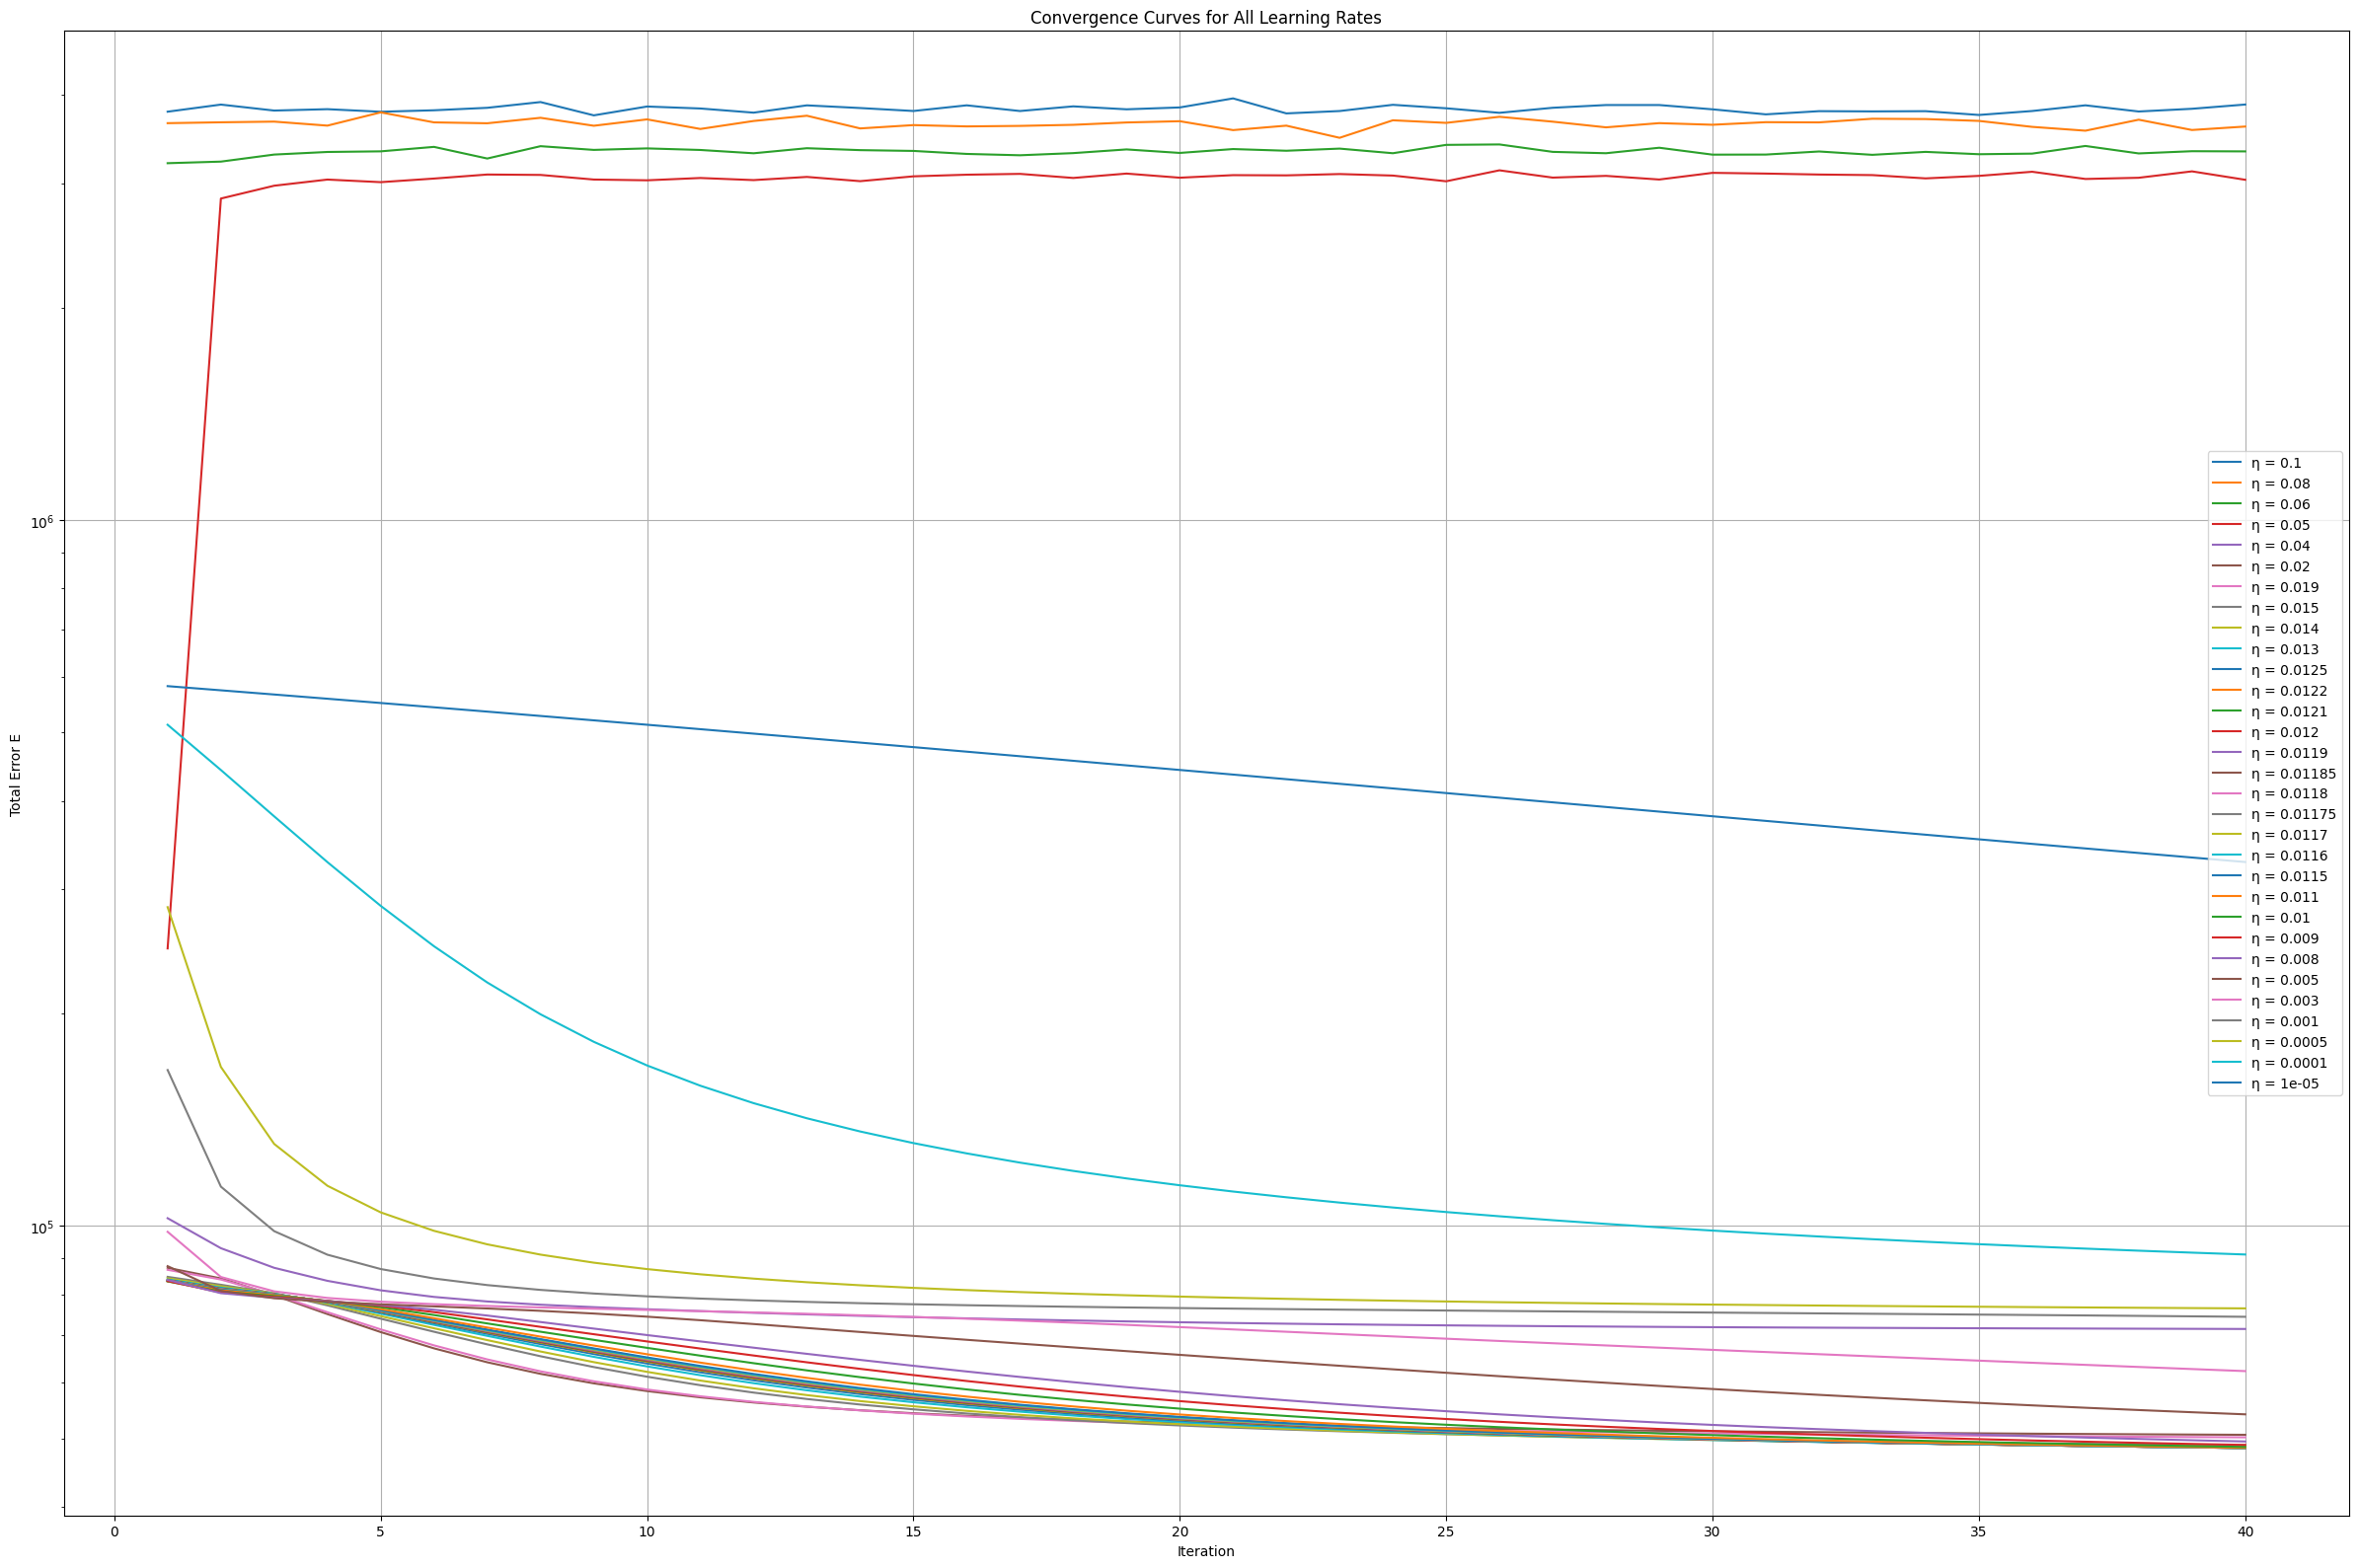

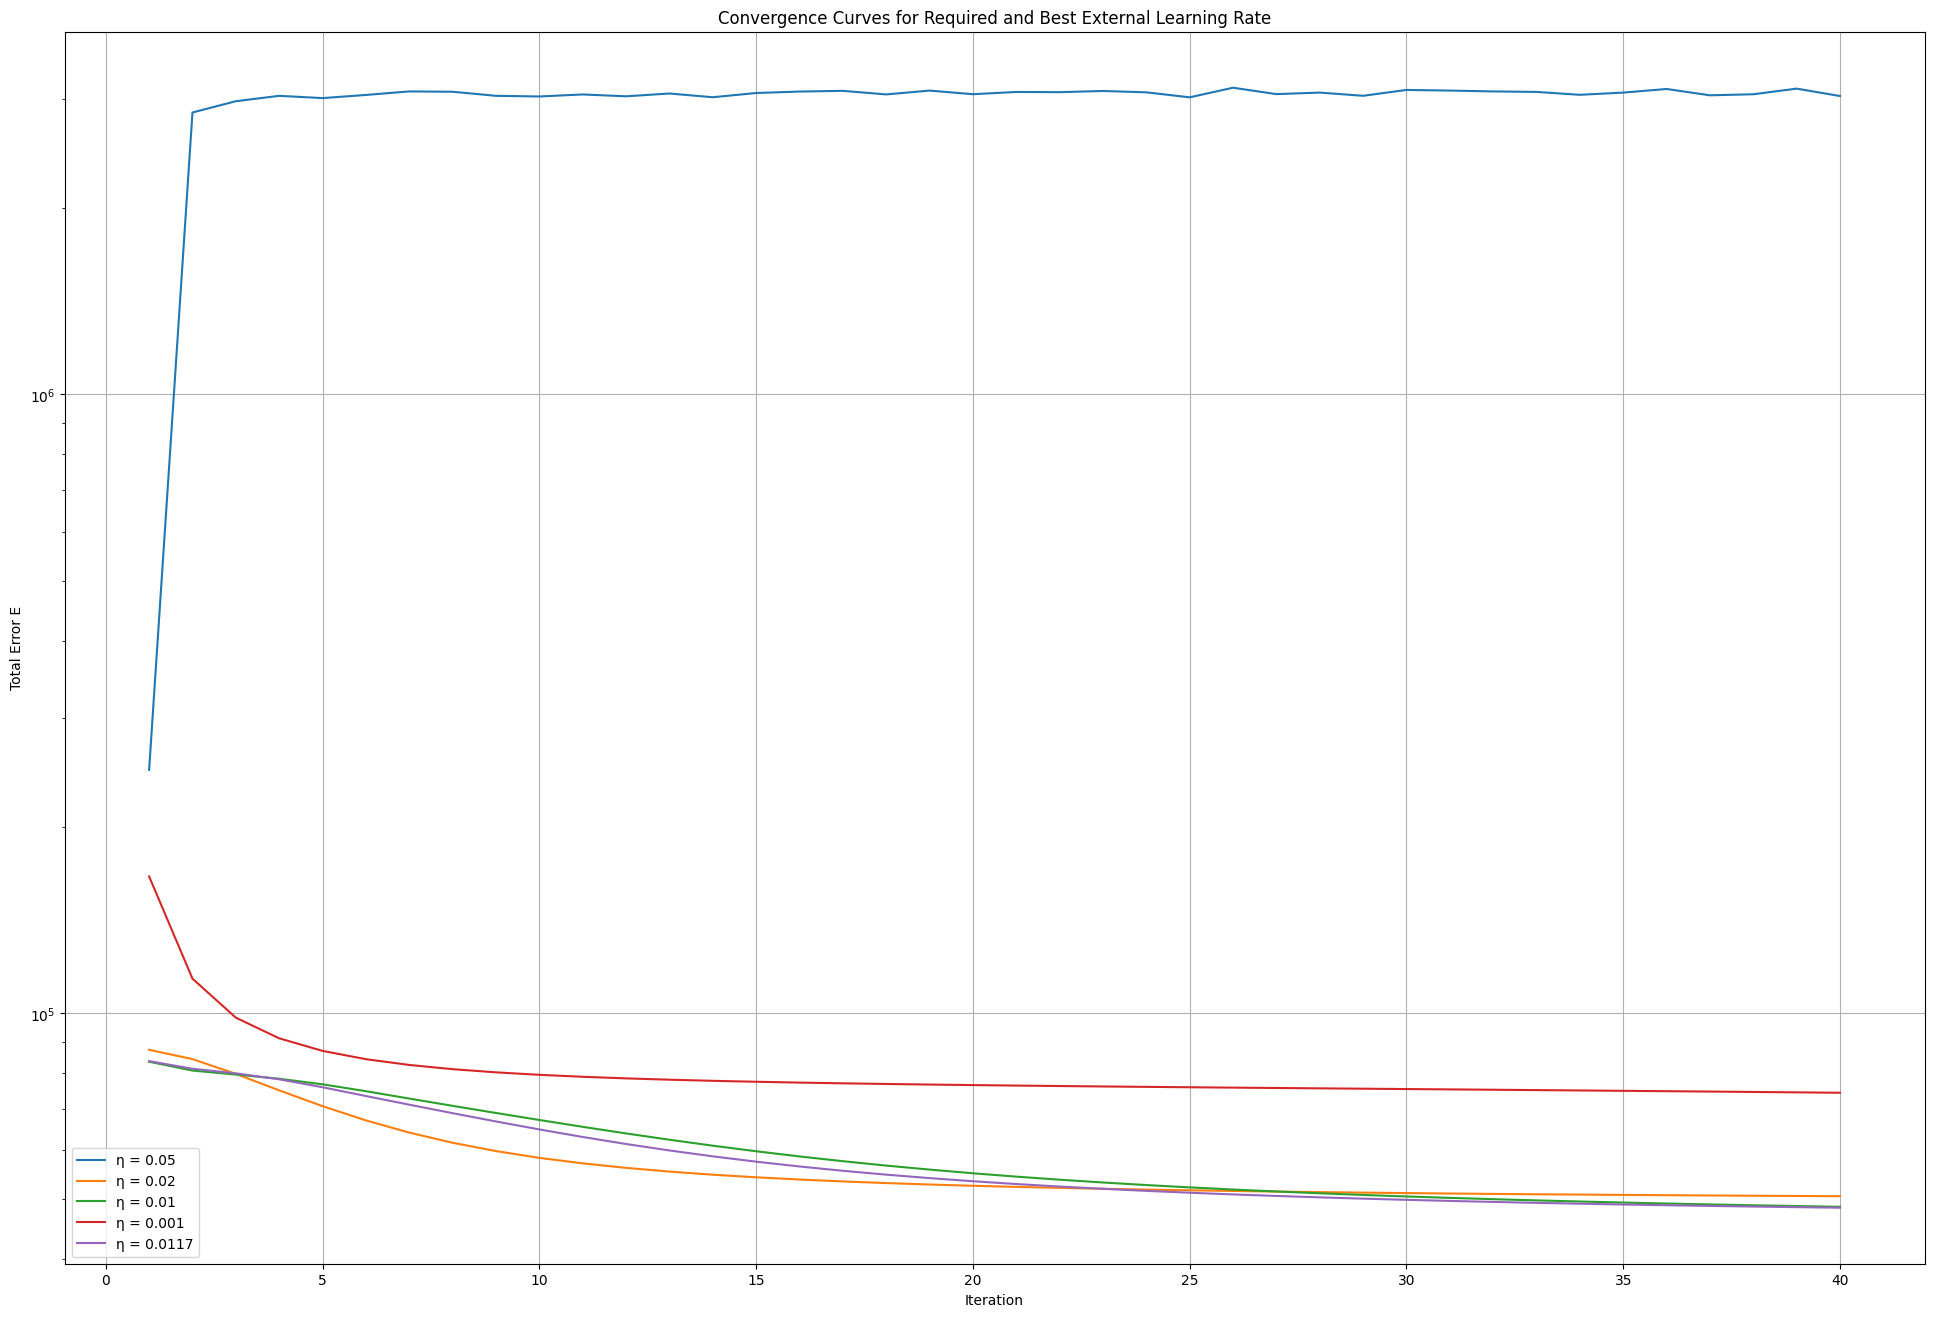

In [15]:
# 參數設置
k = 20          # 潛在因子維度
lambda_reg = 0.1  # 正則化參數
n_iterations = 40  # 迭代次數
max_norm = 5.0   # 範數限制

# 學習率列表，移除重複並添加新值
base_learning_rates = [0.1, 0.08, 0.06, 0.05, 0.04, 0.02, 0.019, 0.015, 0.014, 0.013, 0.0125, 0.0122,0.0121, 0.012, 0.0119, 0.01185, 0.0118, 0.01175, 0.0117, 0.0116, 0.0115, 0.011, 0.01, 0.009, 0.008, 0.005, 0.003, 0.001, 0.0005, 0.0001, 0.00001]
learning_rates = sorted(list(set(base_learning_rates)), reverse=True)

# 確定資料維度
max_user_id = 0
max_item_id = 0
rating_file = "/home/wajason99/datamininghw5/hw5 data/ratings.train.txt"

with open(rating_file, 'r') as f:
    for line in f:
        user_id, item_id, _ = map(int, line.strip().split())
        max_user_id = max(max_user_id, user_id)
        max_item_id = max(max_item_id, item_id)

m = max_user_id  # 總使用者數
n = max_item_id  # 總項目數

# 初始化 P 和 Q
init_bound = np.sqrt(5 / k)  # 滿足 q_i * p_u^T 在 [0, 5] 內
Q = np.random.uniform(0, init_bound, (n, k))  # 項目因子矩陣
P = np.random.uniform(0, init_bound, (m, k))  # 使用者因子矩陣

# 儲存每次迭代的誤差
errors = {eta: [] for eta in learning_rates}

# 對每個學習率進行訓練
for eta in learning_rates:
    print(f"\n訓練學習率 eta = {eta}...")
    Q_copy = Q.copy()
    P_copy = P.copy()
    # 清空當前學習率的誤差列表，防止舊數據影響
    errors[eta] = []
    
    for iteration in range(n_iterations):
        print(f"Iteration {iteration + 1}/{n_iterations}")
        
        # SGD 更新
        with open(rating_file, 'r') as f:
            for line in f:
                user_id, item_id, rating = map(int, line.strip().split())
                u = user_id - 1  # 轉為 0-based 索引
                i = item_id - 1
                # 計算誤差
                pred = np.dot(Q_copy[i], P_copy[u])
                e_iu = rating - pred
                # 更新 q_i 和 p_u
                Q_copy[i] += 2 * eta * (e_iu * P_copy[u] - lambda_reg * Q_copy[i])
                P_copy[u] += 2 * eta * (e_iu * Q_copy[i] - lambda_reg * P_copy[u])
                # 範數限制
                q_norm = np.linalg.norm(Q_copy[i])
                p_norm = np.linalg.norm(P_copy[u])
                if q_norm > max_norm:
                    Q_copy[i] = Q_copy[i] * (max_norm / q_norm)
                if p_norm > max_norm:
                    P_copy[u] = P_copy[u] * (max_norm / p_norm)
        
        # 每次完整迭代後計算總誤差 E
        total_error = 0
        with open(rating_file, 'r') as f:
            for line in f:
                user_id, item_id, rating = map(int, line.strip().split())
                u = user_id - 1
                i = item_id - 1
                pred = np.dot(Q_copy[i], P_copy[u])
                total_error += (rating - pred) ** 2
        reg_term = lambda_reg * (np.sum(P_copy**2) + np.sum(Q_copy**2))
        total_error += reg_term
        errors[eta].append(total_error)
        print(f"Total Error E: {total_error:.2f}")

# 整理表格
print("\n學習率與最終誤差表格：")
print("Learning Rate | Final Error E")
print("-" * 30)
for eta in learning_rates:
    final_error = errors[eta][-1]
    print(f"{eta:11.6f} | {final_error:.2f}")

# 繪製第一張圖（所有學習率）
plt.figure(figsize=(24, 16))
for eta in learning_rates:
    plt.plot(range(1, n_iterations + 1), errors[eta], label=f'η = {eta}')
plt.xlabel('Iteration')
plt.ylabel('Total Error E')
plt.title('Convergence Curves for All Learning Rates')
plt.legend()
plt.grid(True)
plt.yscale('log')  # 使用對數尺度顯示下降趨勢
plt.savefig('convergence_curves_all.png')
plt.tight_layout()
plt.show()

# 繪製第二張圖（題目要求的四個學習率 + 最佳外部學習率）
required_learning_rates = [0.05, 0.02, 0.01, 0.001]
# 從 required_learning_rates 以外的學習率中選出最佳的
external_learning_rates = [eta for eta in learning_rates if eta not in required_learning_rates]
best_external_eta = min(external_learning_rates, key=lambda eta: errors[eta][-1])
plot_learning_rates = required_learning_rates + [best_external_eta]

plt.figure(figsize=(24, 16))
for eta in plot_learning_rates:
    plt.plot(range(1, n_iterations + 1), errors[eta], label=f'η = {eta}')
plt.xlabel('Iteration')
plt.ylabel('Total Error E')
plt.title('Convergence Curves for Required and Best External Learning Rate')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.savefig('convergence_curves_required.png')
plt.show()

In [19]:
# 報告最佳學習率
best_eta = min(learning_rates, key=lambda eta: errors[eta][-1])
print(f"\n最佳學習率(我認為表現最好的學習率) η = {best_eta}，最終誤差 E = {errors[best_eta][-1]:.2f}")
print(f"最佳外部學習率(並非在題目要求的四個學習率) η = {best_external_eta}，最終誤差 E = {errors[best_external_eta][-1]:.2f}")

# 收斂行為與問題討論
print("\n收斂行為與問題討論：")
print("我們通過上述的實驗觀察到不同學習率對模型收斂行為的影響，發現學習率的大小，並非與訓練 40 次的總誤差 E 具有線性的關係，經由實驗我們也發現過大跟過小的 η 都可能造成總誤差 E 。")
print("以下是我們的觀察與討論：")
print("- 較大的 η（如 0.1, 0.08, 0.06）、較小的 η（如 0.001, 0.0001, 0.00001）：")
print("  問題：誤差一直維持在高檔處（例如 η=0.1 時 E=3788777.73），完全無法正常下降或改善。")
print("- 中等偏大的 η（如 0.05, 0.04）：")
print("  優點：η=0.04 開始穩定，誤差顯著下降（E=71086.57）。")
print("  問題：η=0.05 仍稍高（E=3052788.88），可能震盪。")
print("- 最佳範圍 η ∈ [0.008, 0.015]：經過非常大量的測試，發現這個範圍內的 η 表現最佳，因此也進一步在這區間加入更多的量測點，嘗試去找出更低的總誤差。")
print("  優點：經由最終的不懈努力下，最終測得最好的 η=0.0117 ，表現最佳（E=48490.77），穩定收斂且誤差很低。")
print("  問題：需細分範圍以進一步優化、又或者是去嘗試找到其他相對低點去做測試，也許就能更去找到較低的誤差值。")
print("- 總體問題：")
print("  過大跟過小的 η 都會導致總誤差 E 無法有效正確地下降，曲線會一直居高不下。通過找尋到相對最佳值後，也讓誤差有正常的表現，此外通過範數限制也能有效防止溢出，但需更多迭代或調整 λ 進一步降低誤差！")




最佳學習率(我認為表現最好的學習率) η = 0.0117，最終誤差 E = 48490.77
最佳外部學習率(並非在題目要求的四個學習率) η = 0.0117，最終誤差 E = 48490.77

收斂行為與問題討論：
我們通過上述的實驗觀察到不同學習率對模型收斂行為的影響，發現學習率的大小，並非與訓練 40 次的總誤差 E 具有線性的關係，經由實驗我們也發現過大跟過小的 η 都可能造成總誤差 E 。
以下是我們的觀察與討論：
- 較大的 η（如 0.1, 0.08, 0.06）、較小的 η（如 0.001, 0.0001, 0.00001）：
  問題：誤差一直維持在高檔處（例如 η=0.1 時 E=3788777.73），完全無法正常下降或改善。
- 中等偏大的 η（如 0.05, 0.04）：
  優點：η=0.04 開始穩定，誤差顯著下降（E=71086.57）。
  問題：η=0.05 仍稍高（E=3052788.88），可能震盪。
- 最佳範圍 η ∈ [0.008, 0.015]：經過非常大量的測試，發現這個範圍內的 η 表現最佳，因此也進一步在這區間加入更多的量測點，嘗試去找出更低的總誤差。
  優點：經由最終的不懈努力下，最終測得最好的 η=0.0117 ，表現最佳（E=48490.77），穩定收斂且誤差很低。
  問題：需細分範圍以進一步優化、又或者是去嘗試找到其他相對低點去做測試，也許就能更去找到較低的誤差值。
- 總體問題：
  過大跟過小的 η 都會導致總誤差 E 無法有效正確地下降，曲線會一直居高不下。通過找尋到相對最佳值後，也讓誤差有正常的表現，此外通過範數限制也能有效防止溢出，但需更多迭代或調整 λ 進一步降低誤差！
